# **Using LangChain**

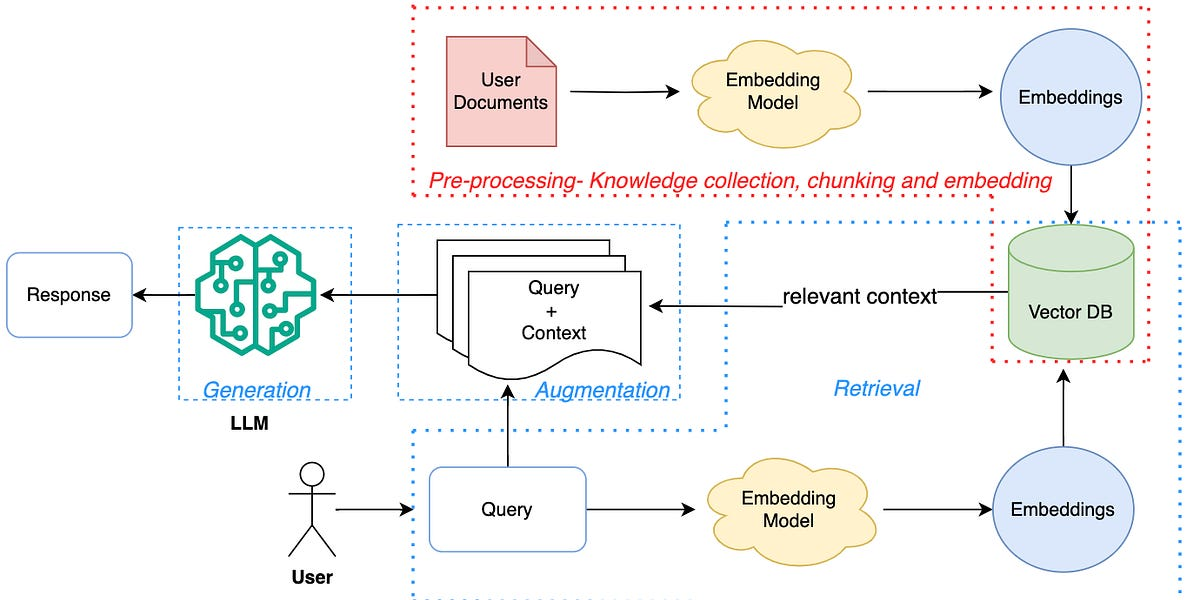

In [1]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import faiss
import time, os
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [2]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001", google_api_key=os.getenv("GOOGLE_API_KEY"))

In [3]:
loader = TextLoader(r"walter_white_yo.txt")
documents = loader.load()

In [4]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=0,
    length_function=len
)

In [5]:
docs = text_splitter.split_documents(documents)

In [6]:
docs[0]

Document(metadata={'source': 'walter_white_yo.txt'}, page_content='For his son, see Walter White Jr.\nWalter White\nBreaking Bad character')

In [7]:
lengths = []
for i in docs:
    lengths.append(len(i.page_content))
print(sum(lengths) / len(lengths))

334.48062015503876


In [8]:
doc_store = FAISS.load_local(r"C:\Stack overflow\Vector embeddings\vector_store_db", embeddings, allow_dangerous_deserialization=True)

In [10]:
total_length = len(docs)
added_length = 0
for i in range(0, len(docs), 10):
    print("Cooking...")
    added_ids = doc_store.add_documents(docs[i:i+10])
    time.sleep(65)
    per_step = len(added_ids)
    added_length += per_step
    print(f"Remaining length: {total_length - added_length}")

Cooking...
Remaining length: 119
Cooking...
Remaining length: 109
Cooking...
Remaining length: 99
Cooking...
Remaining length: 89
Cooking...
Remaining length: 79
Cooking...
Remaining length: 69
Cooking...
Remaining length: 59
Cooking...
Remaining length: 49
Cooking...
Remaining length: 39
Cooking...
Remaining length: 29
Cooking...
Remaining length: 19
Cooking...
Remaining length: 9
Cooking...
Remaining length: 0


In [13]:
print(len(list(doc_store.docstore._dict.keys())))
print(len(docs))

130
129


In [14]:
doc_store.similarity_search_with_score("walter white")

[(Document(id='86ccf26c-b9e8-49b4-b0d2-616622629a63', metadata={'source': 'walter_white_yo.txt'}, page_content='For his son, see Walter White Jr.\nWalter White\nBreaking Bad character'),
  np.float32(0.18126753)),
 (Document(id='b67a30b6-ae6a-4522-95d9-177909558ea3', metadata={'source': 'walter_white_yo.txt'}, page_content='Bryan Cranston as Walter White\nFirst appearance\t\nBreaking Bad:\n"Pilot" (2008)\nBetter Call Saul:\n"Breaking Bad" (2022)\nLast appearance\t\nBreaking Bad:\nEl Camino (2019)\nBetter Call Saul:\n"Saul Gone" (2022)\nCreated by\tVince Gilligan\nPortrayed by\tBryan Cranston\nIn-universe information\nFull name\tWalter Hartwell White Sr.\nAlias\tHeisenberg\nNickname\tWalt\nOccupation\t\nDrug lord\nCo-founder of Gray Matter Technologies\nHigh school chemistry teacher\nCar wash cashier, proprietor, and manager'),
  np.float32(0.21986938)),
 (Document(id='e210e305-3385-44b3-89f7-9dff5e79475c', metadata={'source': 'walter_white_yo.txt'}, page_content="Reception\nCritical re

In [15]:
doc_store.save_local("vector_store_db")